<a href="https://colab.research.google.com/github/Bhavya232003/Deep-Learning-Codes/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

No GPU found, using CPU.
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 128s 314ms/step - accuracy: 0.7019 - loss: 0.5467 - val_accuracy: 0.8382 - val_loss: 0.3676 - learning_rate: 0.0010
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8737 - loss: 0.3118
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
391/391 ━━━━━━━━━━━━━━━━━━━━ 122s 311ms/step - accuracy: 0.8737 - loss: 0.3119 - val_accuracy: 0.8341 - val_loss: 0.3723 - learning_rate: 0.0010
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.9168 - loss: 0.2261
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 330ms/step - accuracy: 0.9167 - loss: 0.2261 - val_accuracy: 0.8353 - val_loss: 0.3953 - learning_rate: 5.0000e-04
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.8356 - loss: 0.3727
Test Score: 0.3676
Test Accuracy: 0.8382


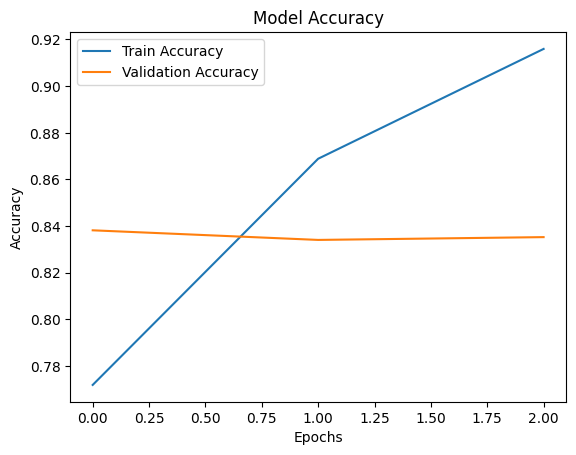

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

device_name = tf.test.gpu_device_name()
print(f"Using device: {device_name}" if device_name else "No GPU found, using CPU.")

max_features = 20000
maxlen = 80
batch_size = 64
epochs = 10

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

y_train, y_test = np.array(y_train, dtype=np.int32), np.array(y_test, dtype=np.int32)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen, dtype=np.float32)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen, dtype=np.float32)

with tf.device('/GPU:0'):
    model = Sequential([
        Embedding(max_features, 128, input_length=maxlen),
        LSTM(128, dropout=0.3, recurrent_dropout=0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=2, verbose=1, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)
]

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(x_test, y_test),
    callbacks=callbacks
)

score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f'Test Score: {score:.4f}')
print(f'Test Accuracy: {acc:.4f}')

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
